# 2024 WS ExplainableAI

🫁 X-Ray Vision: Unveiling What Models See in Chest Radiographs
Using LIME to peek into the black box of chest X-ray classification models

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=30ed40f98945fd843af3f9e7168ebd5dce3695b331c1f182f5c1f649afce0408
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import kagglehub
import torch
import torch.nn as nn
from torchvision import transforms, models
from PIL import Image
import numpy as np
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import os

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pritpal2873/chest-x-ray-dataset-4-categories")

print("Path to dataset files:", path)

100%|██████████| 1.74G/1.74G [00:21<00:00, 85.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/pritpal2873/chest-x-ray-dataset-4-categories/versions/1


In [ ]:
# Find actually location
import os

def find_dataset_location():
    # Common locations to check
    possible_locations = [
        '/content',
        '/root/.cache/kagglehub/datasets',
        '/kaggle/working'
    ]

    print("Searching for dataset...")
    for base_path in possible_locations:
        print(f"\nChecking in {base_path}")
        if os.path.exists(base_path):
            for root, dirs, files in os.walk(base_path):
                print(f"Found directory: {root}")
                if any(file.endswith('.jpg') or file.endswith('.png') for file in files):
                    print(f"Found images in: {root}")
                    return root
    return None


dataset_location = find_dataset_location()
print(f"\nDataset location: {dataset_location}")

# List the contents to reuse
if dataset_location:
    print("\nContents:")
    print(os.listdir(dataset_location))

Searching for dataset...

Checking in /content
Found directory: /content
Found directory: /content/.config
Found directory: /content/.config/configurations
Found directory: /content/.config/logs
Found directory: /content/.config/logs/2024.12.05
Found directory: /content/sample_data

Checking in /root/.cache/kagglehub/datasets
Found directory: /root/.cache/kagglehub/datasets
Found directory: /root/.cache/kagglehub/datasets/pritpal2873
Found directory: /root/.cache/kagglehub/datasets/pritpal2873/chest-x-ray-dataset-4-categories
Found directory: /root/.cache/kagglehub/datasets/pritpal2873/chest-x-ray-dataset-4-categories/versions
Found directory: /root/.cache/kagglehub/datasets/pritpal2873/chest-x-ray-dataset-4-categories/versions/1
Found directory: /root/.cache/kagglehub/datasets/pritpal2873/chest-x-ray-dataset-4-categories/versions/1/Chest X_Ray Dataset
Found directory: /root/.cache/kagglehub/datasets/pritpal2873/chest-x-ray-dataset-4-categories/versions/1/Chest X_Ray Dataset/COVID19
Fo

In [ ]:
import os

directory = '/root/.cache/kagglehub/datasets/pritpal2873/chest-x-ray-dataset-4-categories/versions/1/Chest X_Ray Dataset'

for file in os.listdir(directory):
  print(file)

COVID19
TURBERCULOSIS
PNEUMONIA
NORMAL


# LIME


Explaining an example of NORMAL


  0%|          | 0/500 [00:00<?, ?it/s]

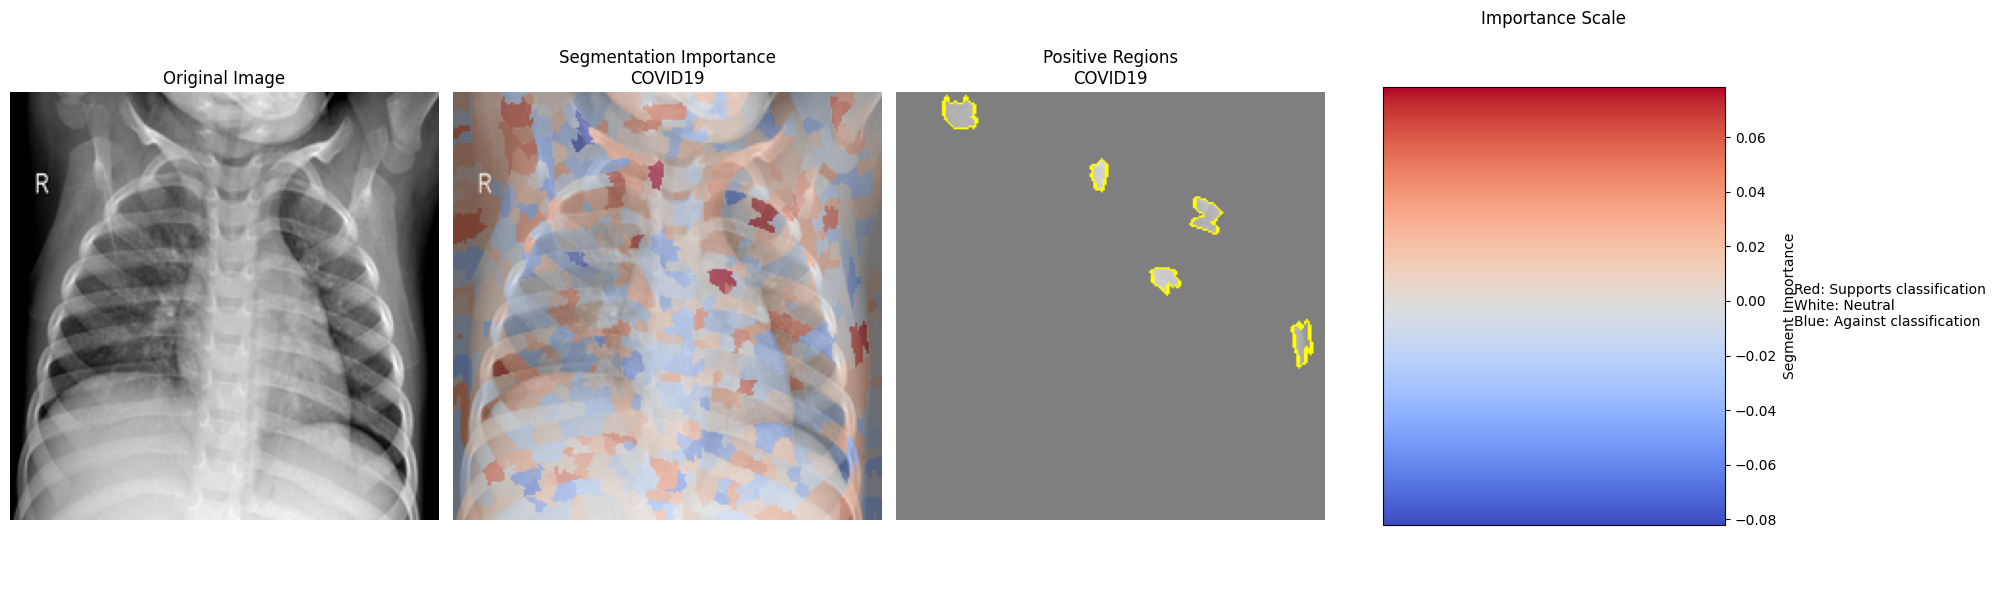


Top reasons for classifying as COVID19:
1. Segment 69: Importance = -0.0823
2. Segment 109: Importance = 0.0785
3. Segment 269: Importance = 0.0773
4. Segment 178: Importance = 0.0723
5. Segment 335: Importance = 0.0667
6. Segment 30: Importance = 0.0616
7. Segment 207: Importance = 0.0616
8. Segment 420: Importance = 0.0610
9. Segment 116: Importance = 0.0606
10. Segment 399: Importance = 0.0599

Explaining an example of COVID19


  0%|          | 0/500 [00:00<?, ?it/s]

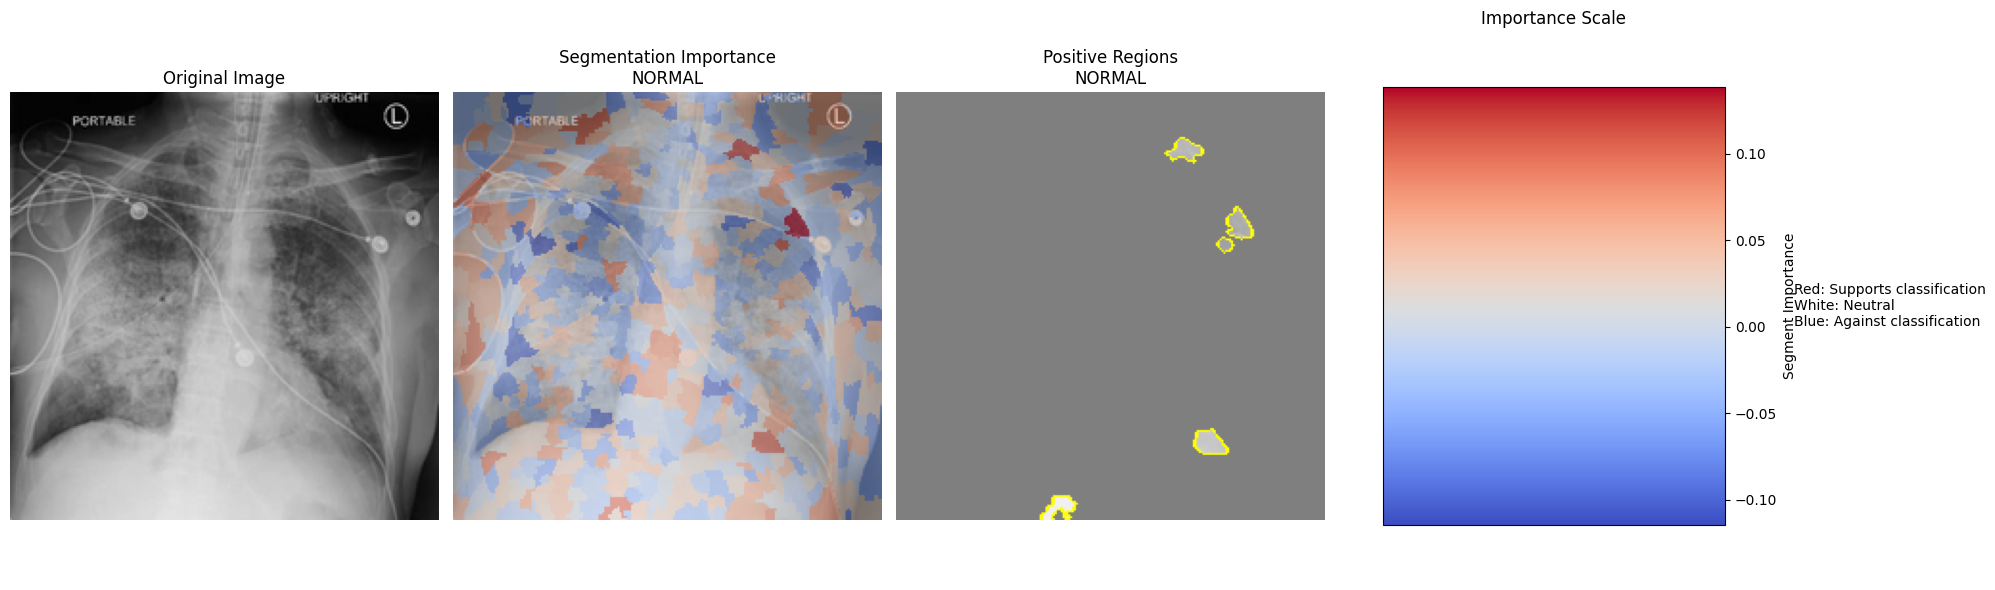


Top reasons for classifying as NORMAL:
1. Segment 179: Importance = 0.1384
2. Segment 63: Importance = 0.1246
3. Segment 205: Importance = -0.1146
4. Segment 498: Importance = 0.1101
5. Segment 211: Importance = 0.1087
6. Segment 580: Importance = 0.1045
7. Segment 37: Importance = 0.0999
8. Segment 127: Importance = -0.0992
9. Segment 375: Importance = -0.0974
10. Segment 464: Importance = -0.0972

Explaining an example of PNEUMONIA


  0%|          | 0/500 [00:00<?, ?it/s]

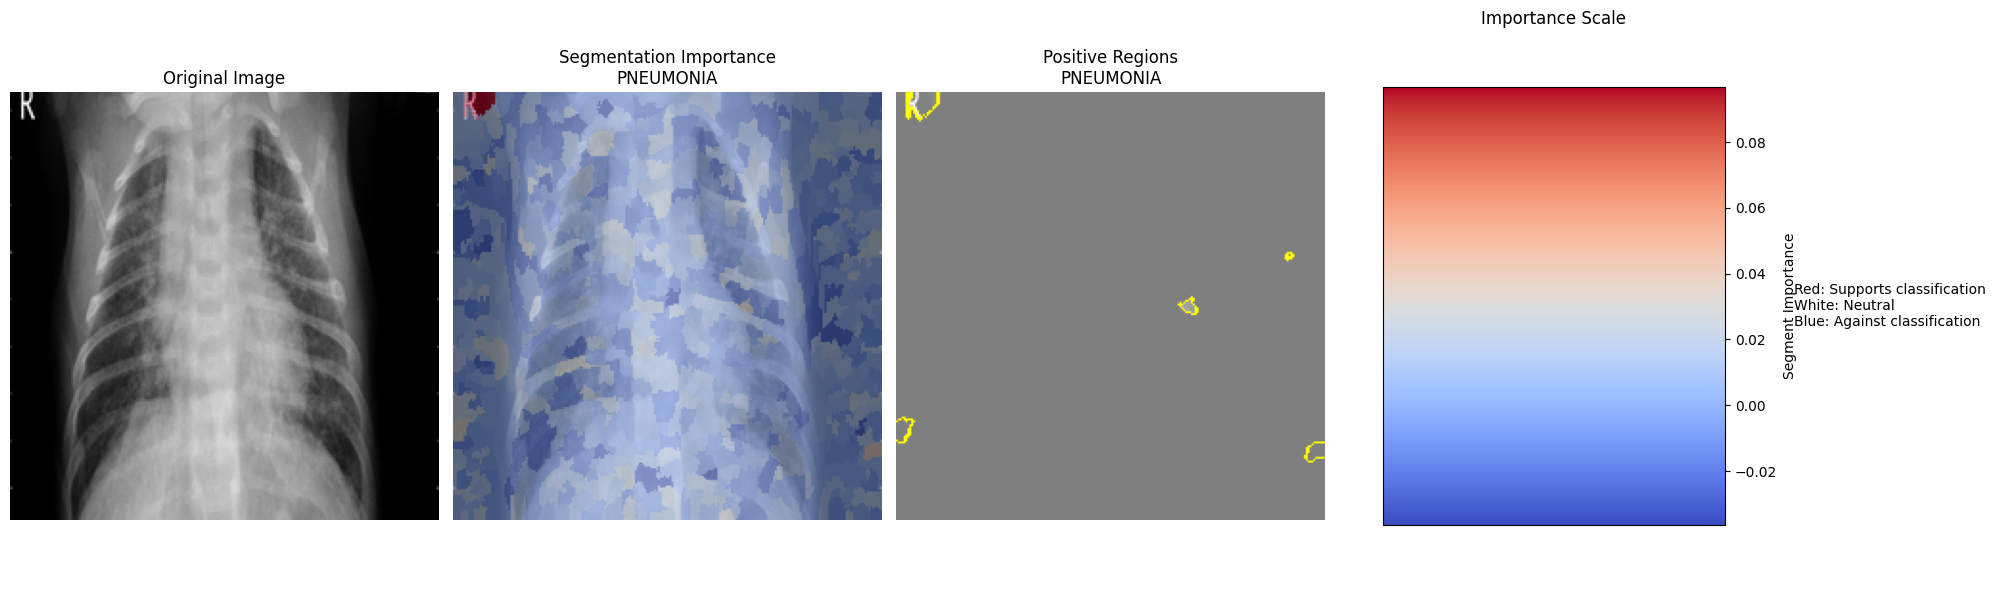


Top reasons for classifying as PNEUMONIA:
1. Segment 12: Importance = 0.0967
2. Segment 534: Importance = 0.0384
3. Segment 300: Importance = -0.0365
4. Segment 578: Importance = -0.0353
5. Segment 309: Importance = 0.0332
6. Segment 17: Importance = -0.0332
7. Segment 491: Importance = 0.0323
8. Segment 582: Importance = -0.0314
9. Segment 236: Importance = 0.0313
10. Segment 405: Importance = 0.0288

Explaining an example of TURBERCULOSIS


  0%|          | 0/500 [00:00<?, ?it/s]

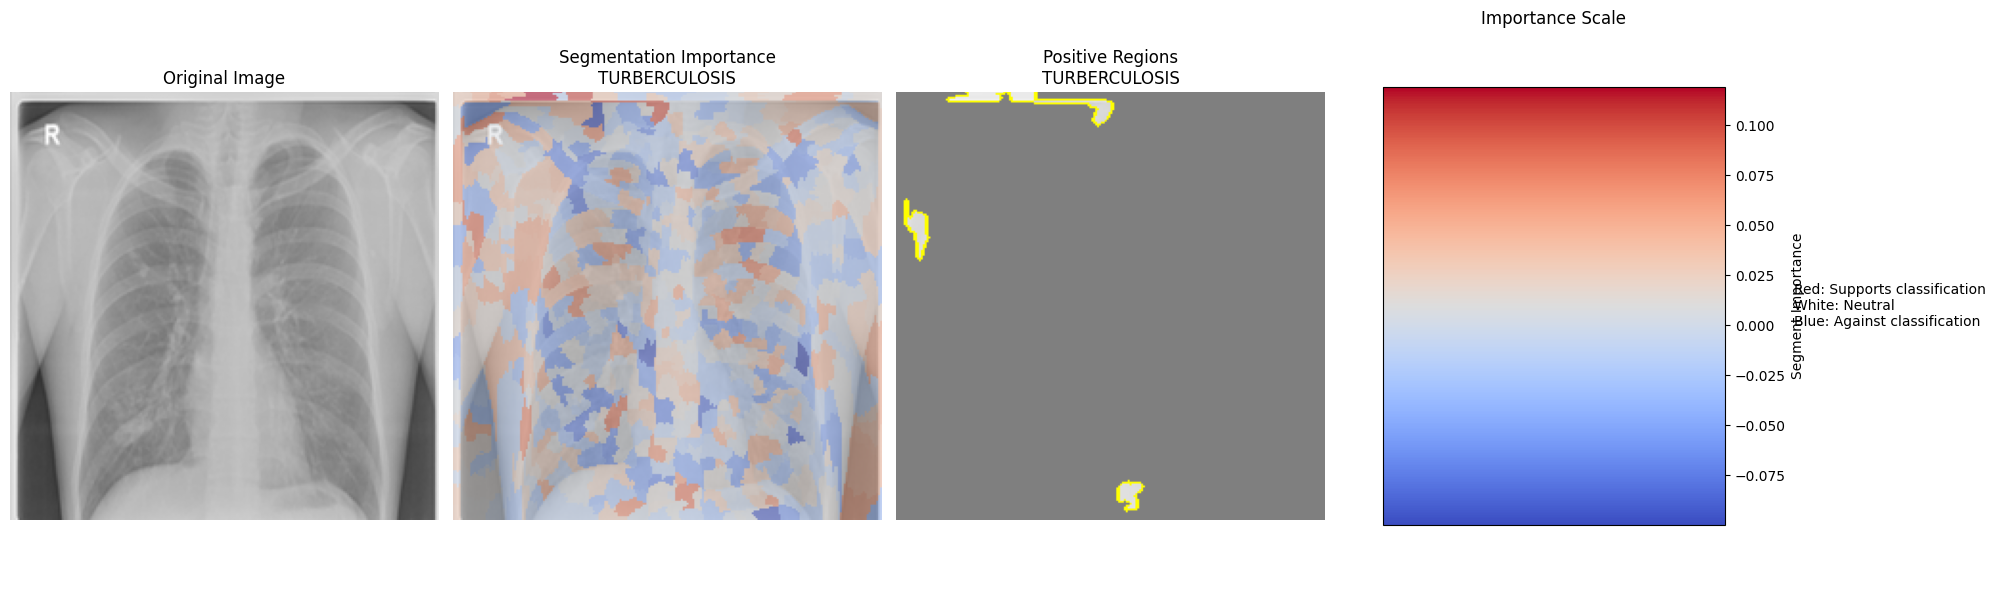


Top reasons for classifying as TURBERCULOSIS:
1. Segment 3: Importance = 0.1192
2. Segment 5: Importance = 0.1045
3. Segment 378: Importance = -0.1000
4. Segment 31: Importance = 0.0965
5. Segment 577: Importance = -0.0955
6. Segment 42: Importance = -0.0940
7. Segment 353: Importance = -0.0939
8. Segment 468: Importance = -0.0884
9. Segment 547: Importance = 0.0821
10. Segment 178: Importance = 0.0820


In [ ]:
import os
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
from lime import lime_image
from lime.wrappers.scikit_image import SegmentationAlgorithm
from skimage.segmentation import mark_boundaries
from torchvision.models import convnext_tiny
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# Memory-efficient model loading
def load_model(model_path):
    # Create the base model architecture
    model = convnext_tiny(weights=None)

    # Modify the classifier head for 4 classes
    num_classes = 4
    model.classifier[2] = nn.Linear(model.classifier[2].in_features, num_classes)

    # Load the state dict with weights_only
    state_dict = torch.load(model_path, map_location=torch.device('cpu'), weights_only=True)

    # Load state dict to the model
    model.load_state_dict(state_dict)
    model.eval()
    return model

# Prepare image preprocessing
def get_image_preprocessor():
    return transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

# Create a prediction function for LIME with reduced memory usage
def create_prediction_fn(model, preprocessor):
    def predict_fn(images):
        # Process images in smaller batches
        batch_size = 10
        all_probs = []

        for i in range(0, len(images), batch_size):
            batch = images[i:i+batch_size]

            # Convert numpy images to tensors
            images_tensor = torch.stack([
                preprocessor(Image.fromarray((img * 255).astype(np.uint8)))
                for img in batch
            ])

            with torch.no_grad():
                outputs = model(images_tensor)
                probabilities = torch.softmax(outputs, dim=1)
                all_probs.append(probabilities.numpy())

            # Clear GPU cache after each batch
            if torch.cuda.is_available():
                torch.cuda.empty_cache()

        return np.concatenate(all_probs, axis=0)

    return predict_fn

def load_dataset(dataset_dir, max_images_per_category=50, target_size=(224, 224)):
    # Use corrected category names
    categories = ['NORMAL', 'COVID19', 'PNEUMONIA', 'TURBERCULOSIS']
    images = []
    labels = []

    for label, category in enumerate(categories):
        category_path = os.path.join(dataset_dir, category)
        category_images = os.listdir(category_path)[:max_images_per_category]

        for img_file in category_images:
            img_path = os.path.join(category_path, img_file)
            try:
                # Open image and resize to target size
                img = Image.open(img_path).convert('RGB')
                img = img.resize(target_size, Image.LANCZOS)
                img = np.array(img) / 255.0  # Normalize to [0, 1]
                images.append(img)
                labels.append(label)
            except Exception as e:
                print(f"Error processing {img_path}: {e}")

    return np.array(images), np.array(labels)

def explain_image(model, image, prediction_fn, category_names):
    # Set up LIME explainer
    explainer = lime_image.LimeImageExplainer()
    segmenter = SegmentationAlgorithm('quickshift', kernel_size=1, max_dist=200, ratio=0.2)

    # Explain the image
    explanation = explainer.explain_instance(
        image,
        classifier_fn=prediction_fn,
        top_labels=len(category_names),
        hide_color=0,  # Gray out hidden regions
        num_samples=500,  # Reduced from 1000
        segmentation_fn=segmenter
    )

    # Get top predicted label
    top_label = explanation.top_labels[0]

    # Prepare the segmentation and local explanation
    segments = explanation.segments
    local_exp = explanation.local_exp[top_label]

    # Extract weights and normalize them
    weights = dict(local_exp)
    min_weight = min(weights.values())
    max_weight = max(weights.values())

    # Create a color-coded segmentation map
    colored_segments = np.zeros_like(image)
    unique_segments = np.unique(segments)

    # Create a color normalization
    norm = mcolors.Normalize(vmin=min_weight, vmax=max_weight)
    cmap = cm.coolwarm  # Red for positive, blue for negative importance

    # Color each segment based on its importance
    for segment in unique_segments:
        mask = (segments == segment)
        importance = weights.get(segment, 0)
        color = cmap(norm(importance))[:3]  # Convert to RGB
        colored_segments[mask] = color

    # Create visualization
    fig, axes = plt.subplots(1, 4, figsize=(20, 6))

    # Original image
    axes[0].imshow(image)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # Full segmentation with color-coded importance
    axes[1].imshow(image * 0.5 + colored_segments * 0.5)  # Blend original and colored segments
    axes[1].set_title(f'Segmentation Importance\n{category_names[top_label]}')
    axes[1].axis('off')

    # Positive contributions
    temp, mask = explanation.get_image_and_mask(
        top_label,
        positive_only=True,
        num_features=5,
        hide_rest=True
    )
    axes[2].imshow(mark_boundaries(temp / 2 + 0.5, mask))
    axes[2].set_title(f'Positive Regions\n{category_names[top_label]}')
    axes[2].axis('off')

    # Colorbar and importance explanation
    axes[3].axis('off')  # Turn off axis for this subplot
    axes[3].set_title('Importance Scale')

    # Create a separate axes for the colorbar
    cax = axes[3].inset_axes([0.1, 0.1, 0.8, 0.8])
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])

    # Add colorbar to the current axes
    fig.colorbar(sm, cax=cax, orientation='vertical',
                 label='Segment Importance')

    # Add text explanation
    cax.text(1.2, 0.5,
             'Red: Supports classification\n' +
             'White: Neutral\n' +
             'Blue: Against classification',
             verticalalignment='center',
             transform=cax.transAxes)

    plt.tight_layout()
    plt.show()

    # Print detailed segment information
    print(f"\nTop reasons for classifying as {category_names[top_label]}:")
    sorted_exp = sorted(local_exp, key=lambda x: abs(x[1]), reverse=True)
    for i, (feature, weight) in enumerate(sorted_exp[:10], 1):
        print(f"{i}. Segment {feature}: Importance = {weight:.4f}")

    return explanation

def main():
    # Set paths
    model_path = '/content/convnext_tiny_xray.pth'
    dataset_dir = '/root/.cache/kagglehub/datasets/pritpal2873/chest-x-ray-dataset-4-categories/versions/1/Chest X_Ray Dataset'

    # Categories with corrected spelling
    category_names = ['NORMAL', 'COVID19', 'PNEUMONIA', 'TURBERCULOSIS']

    # Load model and dataset
    model = load_model(model_path)

    # Load a smaller subset of images to prevent memory issues
    images, labels = load_dataset(dataset_dir, max_images_per_category=10)

    # Preprocessing
    preprocessor = get_image_preprocessor()
    prediction_fn = create_prediction_fn(model, preprocessor)

    # Select an example image from each category
    for label, category in enumerate(category_names):
        print(f"\nExplaining an example of {category}")
        # Find an image of this category
        category_images = images[labels == label]
        if len(category_images) > 0:
            example_image = category_images[0]

            # Explain the image
            explanation = explain_image(
                model,
                example_image,
                prediction_fn,
                category_names
            )

            # Clear memory after each explanation
            import gc
            gc.collect()
            if torch.cuda.is_available():
                torch.cuda.empty_cache()

if __name__ == '__main__':
    main()